In [2]:
%matplotlib notebook


import pickle as pkl
from graph_tool import Graph, load_graph
from glob import glob
from utils import earliest_obs_node
from gt_utils import edges_to_directed_tree, get_roots
from feasibility import is_arborescence
from tqdm import tqdm


In [9]:
np.nonzero(t.degree_property_map('in').a > 1)[0]

array([14, 20])

In [3]:
from gt_utils import edges2graph
g = load_graph('data/grid-64/graph.gt')
p = 'outputs/paper_experiment/grid-64/si/no-order/qs/0.15/84.pkl'
infection_times, source, obs_nodes, true_edges, pred_edges = pkl.load(open(p, 'rb'))
t = edges2graph(g, pred_edges)

assert is_arborescence(t)    

in_degree.max() > 1


AssertionError: 

In [21]:
from gt_utils import edges2graph
t2 = edges2graph(g, pred_edges)
is_arborescence(t2)
extract_edges(t2)

in_degree.max() > 1


[(6, 14),
 (12, 20),
 (12, 13),
 (13, 14),
 (17, 18),
 (18, 19),
 (19, 20),
 (20, 21),
 (21, 22),
 (22, 30),
 (30, 38),
 (38, 46),
 (46, 47)]

In [25]:
extract_edges(t)

[(12, 20),
 (12, 13),
 (13, 14),
 (14, 6),
 (18, 17),
 (19, 18),
 (20, 21),
 (20, 19),
 (21, 22),
 (22, 30),
 (30, 38),
 (38, 46),
 (46, 47)]

In [24]:
root = earliest_obs_node(obs_nodes, infection_times)
t = get_steiner_tree(g, root, obs_nodes)

is_arborescence(t)
set(map(lambda s: tuple(sorted(s)), extract_edges(t))) == set(map(lambda s: tuple(sorted(s)), pred_edges))

True

In [10]:
from graph_tool import GraphView
from graph_tool.topology import min_spanning_tree
from steiner_tree import get_steiner_tree, build_closure
from utils import extract_edges
from feasibility import is_arborescence
from gt_utils import is_tree

gc, eweight, r2pred = build_closure(g, obs_nodes)
tree_map = min_spanning_tree(gc, eweight, root=None)
gc_tree = GraphView(gc, directed=False, efilt=tree_map)

t = get_steiner_tree(g, obs_nodes)
extract_edges(t)
is_tree(t)

TypeError: get_steiner_tree() missing 1 required positional argument: 'obs_nodes'

In [6]:
pred_edges

[(6, 14),
 (12, 20),
 (12, 13),
 (13, 14),
 (17, 18),
 (18, 19),
 (19, 20),
 (20, 21),
 (21, 22),
 (22, 30),
 (30, 38),
 (38, 46),
 (46, 47)]

<IPython.core.display.Javascript object>


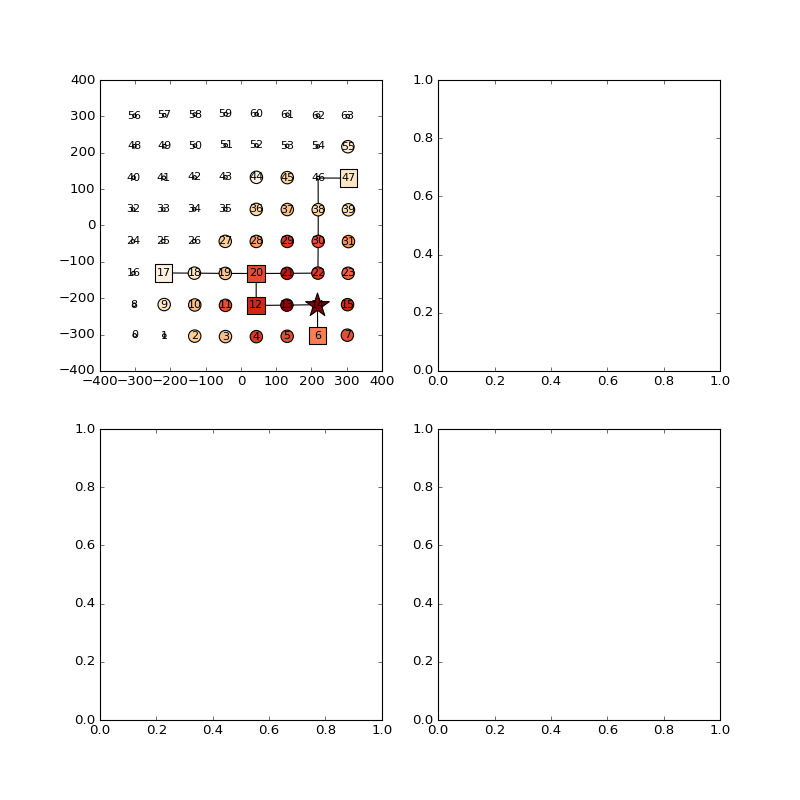

In [5]:
from matplotlib import pyplot as plt

from plot_utils import plot_snapshot
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

gnx = nx.read_graphml('data/grid/2-6/graph.graphml')
gnx = nx.relabel_nodes(gnx, {i: int(i) for i in gnx.nodes_iter()})
pos = graphviz_layout(gnx, root=0)


fig, ax = plt.subplots(2, 2, figsize=(10, 10))
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True,
              ax=ax[0, 0],
              edges=pred_edges)
if False:
    plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True,
                  ax=ax[0, 1],
                  edges=extract_edges(gc))
    plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True,
                  ax=ax[1, 0],
                  edges=extract_edges(gc_tree))
    plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True,
                  ax=ax[1, 1],
                  edges=vis.edges)